# <font color='red'>Black Friday Sales EDA</font>

## <font color='green'>About Dataset</font>
### <font color='blue'>Dataset History</font>

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### <font color='blue'>Date Preprocessing</font>

* Check basic statistics of dataset
* Check for missing values in the data
* check for unique values in data
* Perform EDA
* Purchase Distribution
* check for outliers
* Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc
* Drop unnecessary fields
* Convert categorical data into integer using map function (e.g 'Gender' column)
* missing value treatment
* Rename columns
* fill nan values
* map range variables into integers (e.g 'Age' column)

### <font color='blue'>Data Visualisation</font>

* visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Product_category_1 vs Purchased
* Product_category_2 vs Purchased
* Product_category_3 vs Purchased
* City category pie chart
* check for more possible plots

https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda

In [72]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from math import sqrt, pow
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

# warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [73]:
df = pd.read_csv("data/black-friday-sales-eda.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [74]:
df.shape

(550068, 12)

In [75]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [76]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## <font color='red'>Data Cleaning</font>

* Product_Category_2: Replace NAN value with most occurred category in the actual column.
* Product_Category_3: Replace NAN value with most occurred category in the actual column.

In [77]:
mode_product_cat2 = df['Product_Category_2'].mode()[0]
mode_product_cat3 = df['Product_Category_3'].mode()[0]

In [78]:
df['Product_Category_2'].fillna(mode_product_cat2, inplace=True)
df['Product_Category_3'].fillna(mode_product_cat3, inplace=True)

## <font color='red'>Format Data</font>

* Gender: F-Female, M-Male
* Marital_Status: 0: Single, 1: Married
* Combine 2 columns: Gender and Marital_Status

In [79]:
df['Gender'] = df['Gender'].replace(['F', 'M'], ['Female', 'Male'])

In [80]:
df['Marital_Status'] = df['Marital_Status'].replace([0,1], ['Single', 'Married'])

In [81]:
df['G_MS'] = df["Gender"].str.cat(df["Marital_Status"], sep = ", ")

## 📊 <font color='red'>Data Visualizations</font> 🖼

* visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Productcategory1 vs Purchased
* Productcategory2 vs Purchased
* Productcategory3 vs Purchased
* City category pie chart
* check for more possible plots

In [82]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


## <font color='red'>Visualize individual column</font>
### Column `Product_ID`

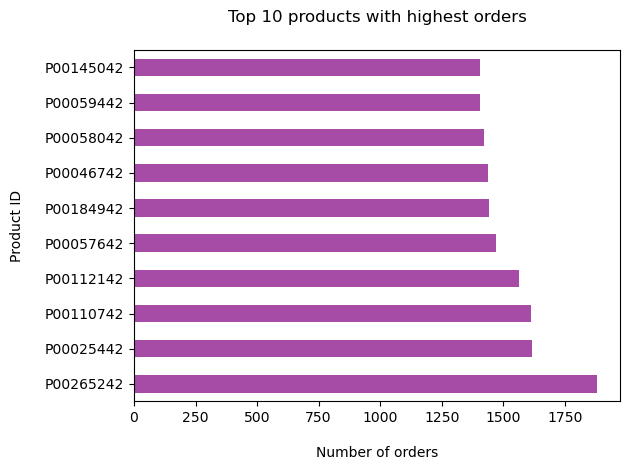

In [83]:
product_col = df['Product_ID'].value_counts().head(10)

ax = product_col.plot(kind='barh', 
                      stacked=False,
                      color='purple', alpha=0.7)
plt.xlabel('Number of orders', labelpad=15)
plt.ylabel('Product ID', labelpad=15)
plt.title('Top 10 products with highest orders', pad=20)
plt.tight_layout()
plt.show;

### Column `Gender`

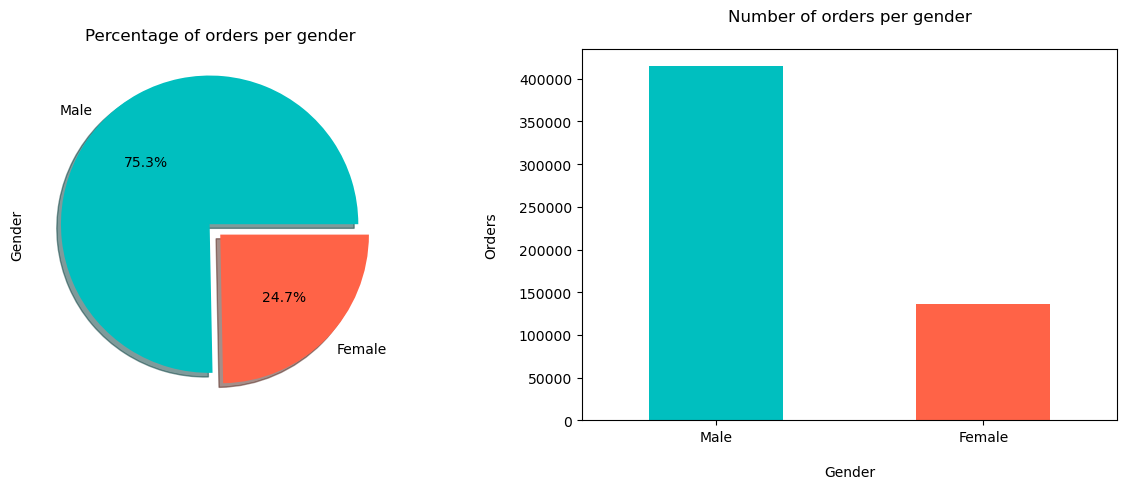

In [121]:
gender_col = df['Gender'].value_counts()

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

gender_col.plot(ax = ax1,
                kind='pie', labels = gender_col.index,
                autopct = '%1.1f%%', colors = ['c', 'tomato'],
                explode = (0.1, 0), shadow = True);

gender_col.plot(ax = ax2,
                kind='bar', stacked=False, 
                color=['c', 'tomato'], rot=0);

ax1.set_title('Percentage of orders per gender');

ax2.set_xlabel('Gender', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per gender', pad=20);

plt.tight_layout()

### Column `Age`

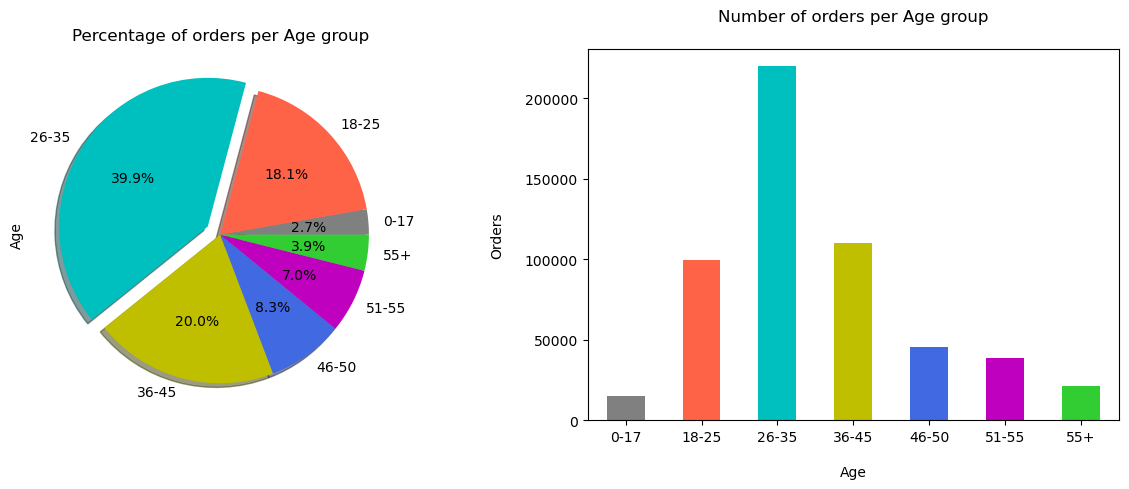

In [122]:
age_type = CategoricalDtype(categories=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55","55+"], ordered=True)
age_col = df['Age'].astype(age_type).value_counts(sort=False)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

age_col.plot(ax = ax1,
             kind ='pie',
             labels = age_col.index, autopct = '%1.1f%%',
             colors = ['gray','tomato','c','y','royalblue','m','limegreen'],             
             explode = (0, 0, 0.1, 0, 0, 0, 0), shadow = True);

age_col.plot(ax = ax2,
             kind='bar',
             stacked=False, rot=0,
             color = ['gray','tomato','c','y','royalblue','m','limegreen']);

ax1.set_title('Percentage of orders per Age group');

ax2.set_xlabel('Age', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Age group', pad=20);

plt.tight_layout()

### Column `Occupation`

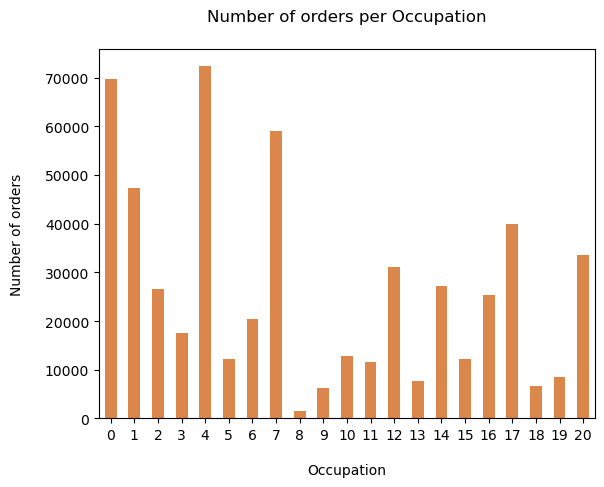

In [124]:
occ_type = CategoricalDtype(categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], ordered=True)
occ_col = df['Occupation'].astype(occ_type).value_counts(sort=False)

ax = occ_col.plot(kind='bar', 
                  stacked=False, rot=0,
                  color='chocolate', alpha=0.8)
plt.xlabel('Occupation', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Occupation', pad=20)
plt.show;

### Column `City_Category`

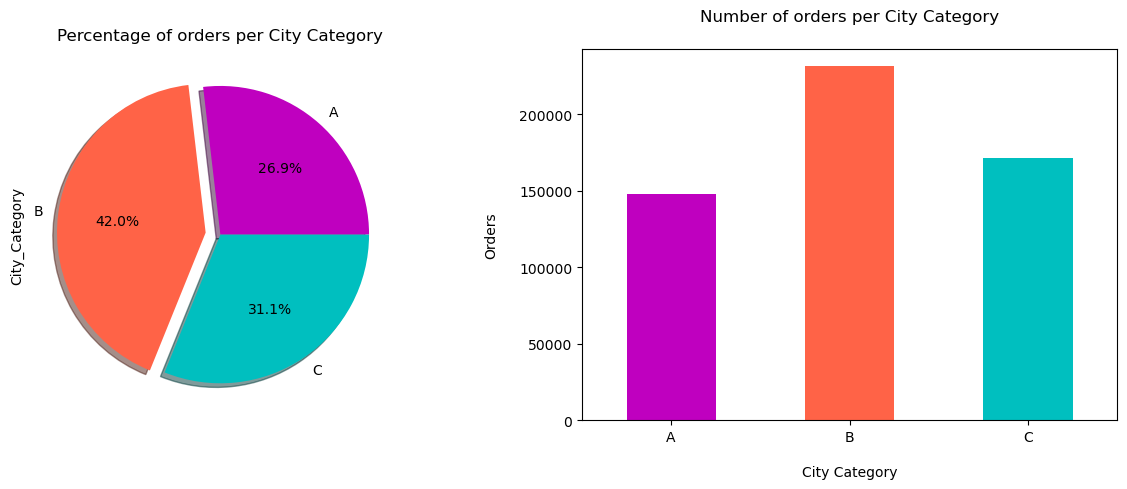

In [125]:
city_type = CategoricalDtype(categories=["A", "B", "C"], ordered=True)
city_cat_col = df['City_Category'].astype(city_type).value_counts(sort=False)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

city_cat_col.plot(ax = ax1,
                 kind='pie',
                 labels = city_cat_col.index,
                 autopct = '%1.1f%%', colors = ['m','tomato','c'],
                 explode = (0, 0.1, 0), shadow = True);

city_cat_col.plot(ax = ax2,
                 kind='bar',
                 stacked=False, rot=0,
                 color=['m','tomato','c']);

ax1.set_title('Percentage of orders per City Category');

ax2.set_xlabel('City Category', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per City Category', pad=20);

plt.tight_layout()

### Column `Stay_In_Current_City_Years`

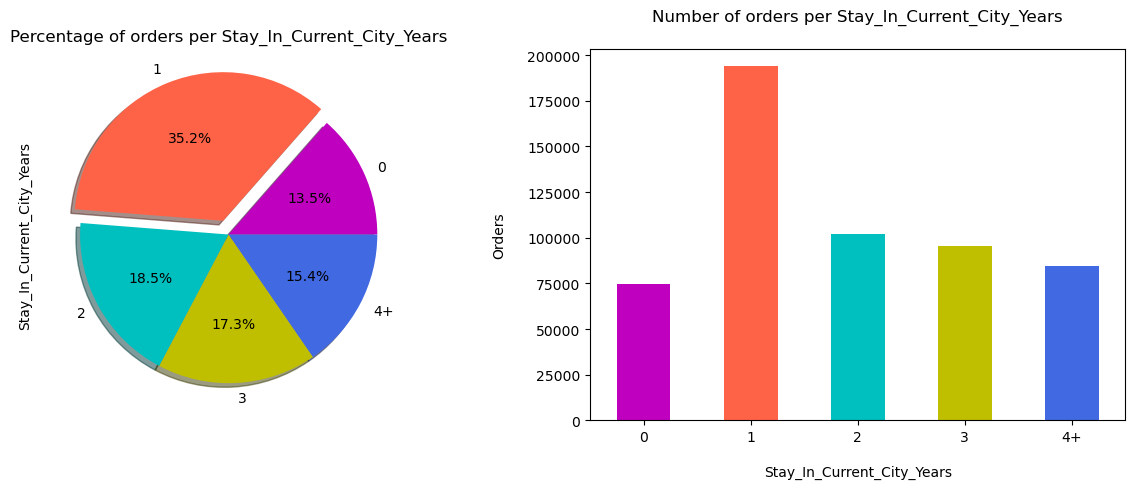

In [127]:
city_years_type = CategoricalDtype(categories=["0", "1", "2","3","4+"], ordered=True)
city_years_col = df['Stay_In_Current_City_Years'].astype(city_years_type).value_counts(sort=False)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

city_years_col.plot(ax=ax1,
                    kind='pie',
                    labels = city_years_col.index,
                    autopct = '%1.1f%%',
                    colors = ['m','tomato','c','y','royalblue'],
                    explode = (0, 0.1, 0, 0, 0), shadow = True);

city_years_col.plot(ax=ax2,
                    kind='bar',
                    stacked=False, rot=0,
                    color=['m','tomato','c','y','royalblue']);

ax1.set_title('Percentage of orders per Stay_In_Current_City_Years');

ax2.set_xlabel('Stay_In_Current_City_Years', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Stay_In_Current_City_Years', pad=20);

plt.tight_layout()

### Column `Marital_Status`

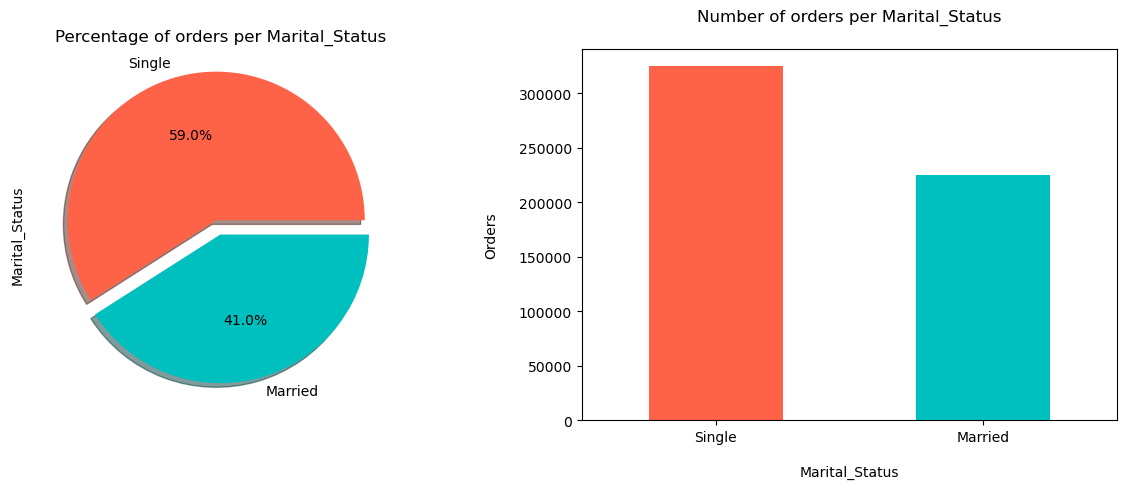

In [137]:
marital_stt_col = df['Marital_Status'].value_counts()

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

marital_stt_col.plot(ax=ax1,
                    kind='pie',
                    labels = marital_stt_col.index,
                    autopct = '%1.1f%%', colors = ['tomato','c'],
                    explode = (0.1, 0), shadow = True);

marital_stt_col.plot(ax=ax2,
                    kind='bar',
                    stacked=False, rot=0,
                    color=['tomato','c']);

ax1.set_title('Percentage of orders per Marital_Status');

ax2.set_xlabel('Marital_Status', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Marital_Status', pad=20);

plt.tight_layout()

### Column `Product_Category_1/2/3`

In [133]:
product_cat1_type = CategoricalDtype(categories=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], ordered=True)
product_cat1_col = df['Product_Category_1'].astype(product_cat1_type).value_counts(sort=False)

product_cat2_type = CategoricalDtype(categories=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], ordered=True)
product_cat2_col = df['Product_Category_2'].astype(product_cat2_type).value_counts(sort=False)

product_cat3_type = CategoricalDtype(categories=[3,4,5,6,8,9,10,11,12,13,14,15,16,17], ordered=True)
product_cat3_col = df['Product_Category_3'].astype(product_cat3_type).value_counts(sort=False)

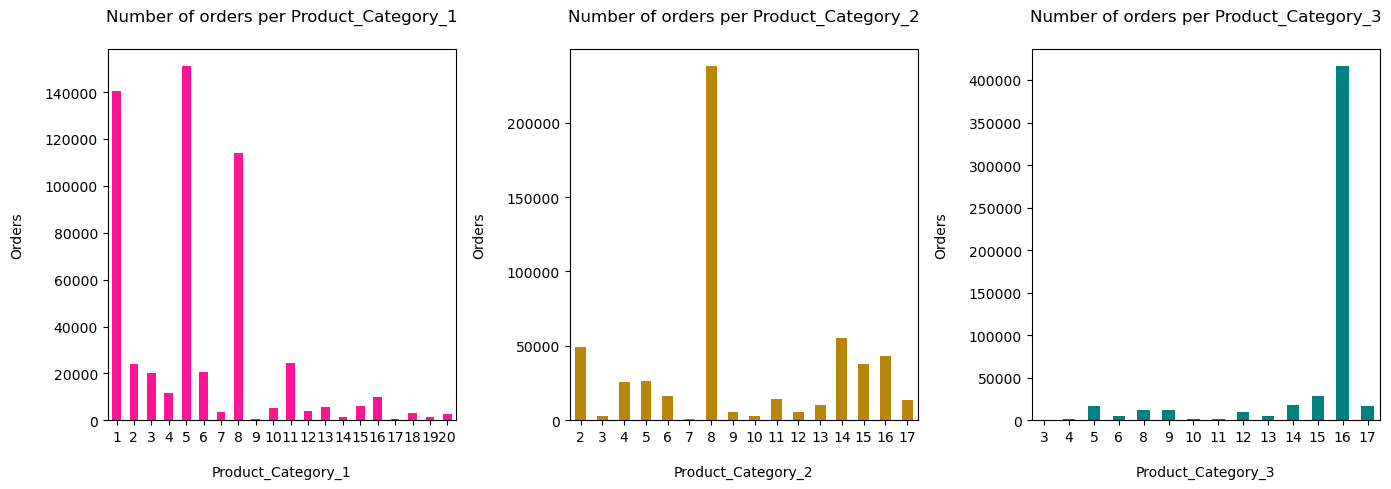

In [142]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

product_cat1_col.plot(ax=ax1,
                    kind='bar',
                    stacked=False, rot=0,
                    color='deeppink');

product_cat2_col.plot(ax=ax2,
                    kind='bar',
                    stacked=False, rot=0,
                    color='darkgoldenrod');

product_cat3_col.plot(ax=ax3,
                    kind='bar',
                    stacked=False, rot=0,
                    color='teal');

ax1.set_xlabel('Product_Category_1', labelpad=15);
ax1.set_ylabel('Orders', labelpad=15);
ax1.set_title('Number of orders per Product_Category_1', pad=20);

ax2.set_xlabel('Product_Category_2', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Product_Category_2', pad=20);

ax3.set_xlabel('Product_Category_3', labelpad=15);
ax3.set_ylabel('Orders', labelpad=15);
ax3.set_title('Number of orders per Product_Category_3', pad=20);

plt.tight_layout()

### Column `Purchase`

In [36]:
mean_purchase = df['Purchase'].mean()
median_purchase = df['Purchase'].median()
mode_purchase = df['Purchase'].mode()[0]

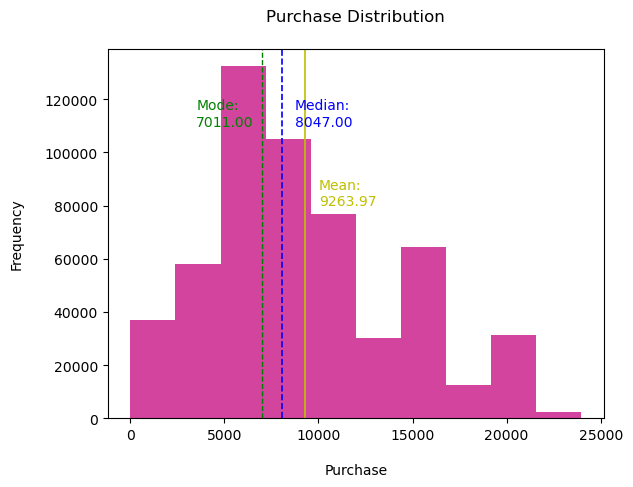

In [37]:
ax = df['Purchase'].plot(kind='hist', 
                        stacked=False, rot=0,
                        color='mediumvioletred',
                        alpha=0.8)

ax.axvline(mean_purchase, color='y', linestyle='-', linewidth=1.2)
ax.text(mean_purchase+750, 80000, f"Mean:\n{mean_purchase:.2f}", color="y")

ax.axvline(median_purchase, color='b', linestyle='dashed', linewidth=1.2)
ax.text(median_purchase+700, 110000, f"Median:\n{median_purchase:.2f}", color="b")

ax.axvline(mode_purchase, color='g', linestyle='--', linewidth=1)
ax.text(mode_purchase-3500, 110000, f"Mode:\n{mode_purchase:.2f}", color="g")

plt.xlabel('Purchase', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Purchase Distribution', pad=20)
plt.show;

### Column `G_MS (Gender & Marital Status)`

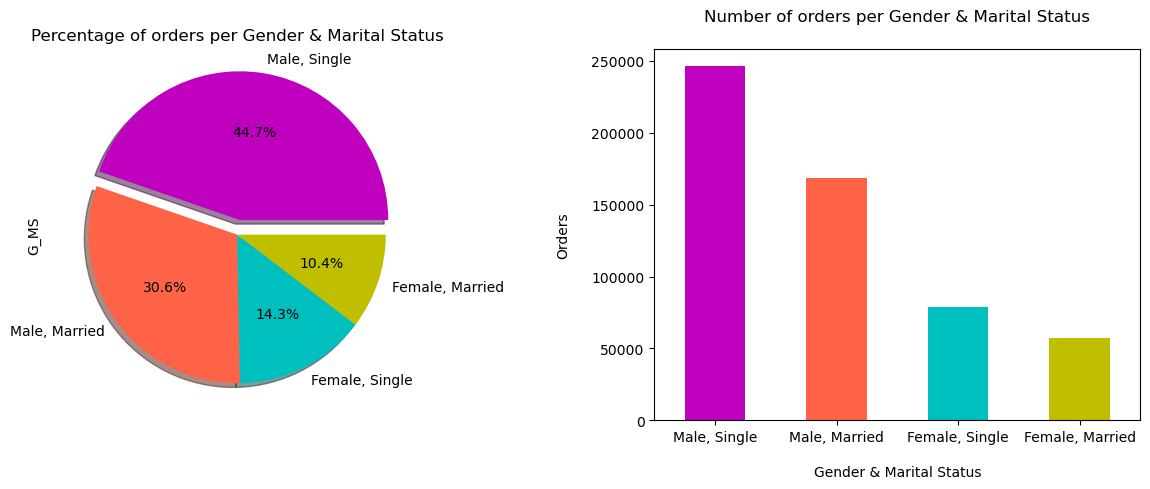

In [143]:
g_ms_col = df['G_MS'].value_counts()

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

g_ms_col.plot(ax=ax1,
              kind='pie', 
              labels = g_ms_col.index,
              autopct = '%1.1f%%',
              colors = ['m','tomato','c','y'],
              explode = (0.1, 0, 0, 0), 
              shadow = True);

g_ms_col.plot(ax=ax2,
            kind='bar', 
            stacked=False,
            color=['m','tomato','c','y'], rot=0);

ax1.set_title('Percentage of orders per Gender & Marital Status');

ax2.set_xlabel('Gender & Marital Status', labelpad=15);
ax2.set_ylabel('Orders', labelpad=15);
ax2.set_title('Number of orders per Gender & Marital Status', pad=20);

plt.tight_layout()

## <font color='red'>Visualize grouped column</font>
## <font color='red'>By column `'G_MS' (Gender & Marital Stt)`</font>

### Column 'G_MS' (Gender & Marital Stt) vs 'Age'

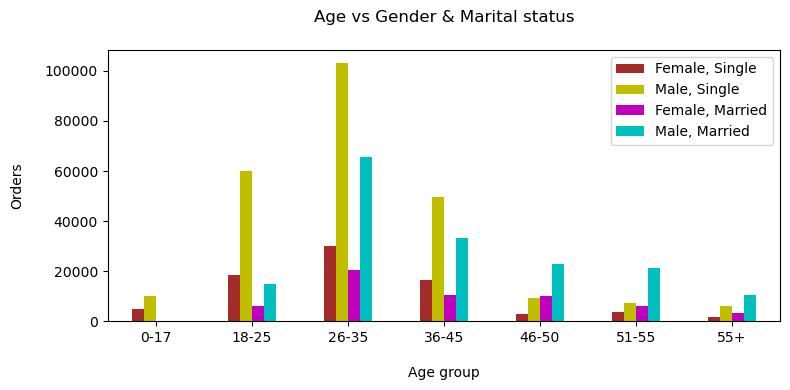

In [165]:
g_ms_type = CategoricalDtype(categories=["Female, Single","Male, Single",
                                         "Female, Married", "Male, Married"], 
                             ordered=True)
df_gms_age = df['G_MS'].astype(g_ms_type).groupby(df['Age']).value_counts(sort=False).unstack()

ax = df_gms_age.plot(kind='bar', 
                    stacked=False,
                    color=['brown', 'y', 'm','c'], rot=0,
                    figsize=(8,4))
plt.xlabel('Age group', labelpad=15)
plt.ylabel('Orders', labelpad=15)
plt.title('Age vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

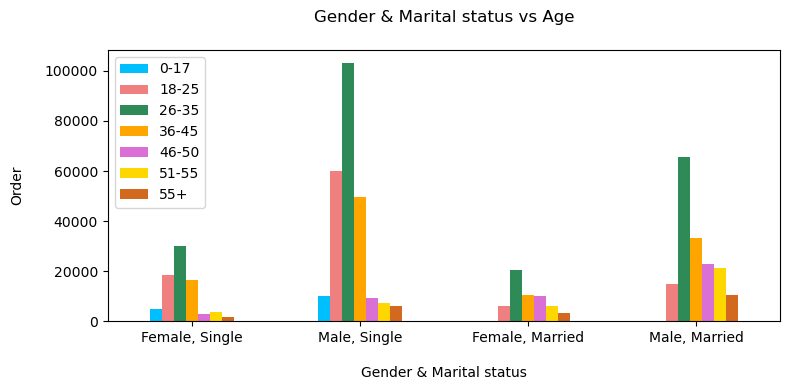

In [166]:
df_age_gms = df['Age'].astype(age_type).groupby(df['G_MS'].astype(g_ms_type)).value_counts(sort=False).unstack()

ax = df_age_gms.plot(kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                           'orchid','gold','chocolate'], 
                    rot=0,
                    figsize=(8,4))
plt.xlabel('Gender & Marital status', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Gender & Marital status vs Age', pad=20)
plt.tight_layout()
plt.show;

### Column G_MS vs Occupation

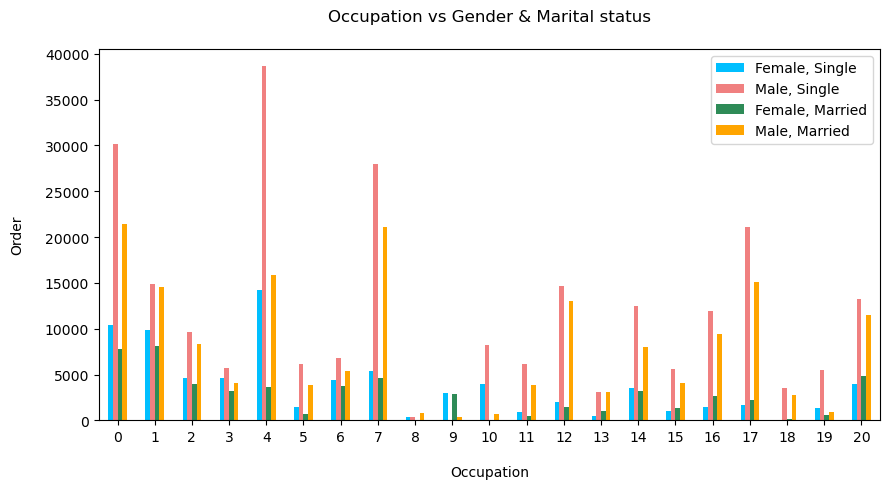

In [170]:
df_occ_gms = df['G_MS'].astype(g_ms_type).groupby(df['Occupation'].astype(occ_type)).value_counts(sort=False).unstack()

ax = df_occ_gms.plot(kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                           'orchid','gold','chocolate'], 
                    rot=0,
                    figsize=(9,5))
plt.xlabel('Occupation', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Occupation vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column G_MS vs City_Category

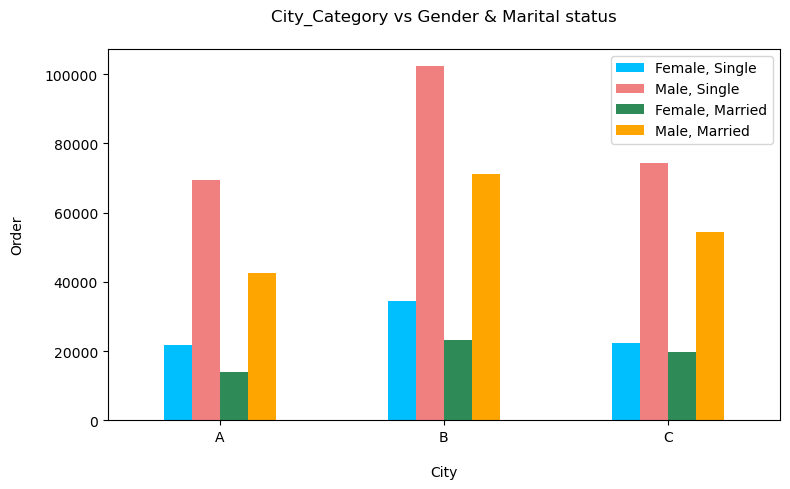

In [172]:
df_citycat_gms = df['G_MS'].astype(g_ms_type).groupby(df['City_Category'].astype(city_type)).value_counts(sort=False).unstack()

ax = df_citycat_gms.plot(kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                               'orchid','gold','chocolate'], 
                        rot=0,
                        figsize=(8,5))
plt.xlabel('City', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('City_Category vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column Stay_In_Current_City_Years vs G_MS

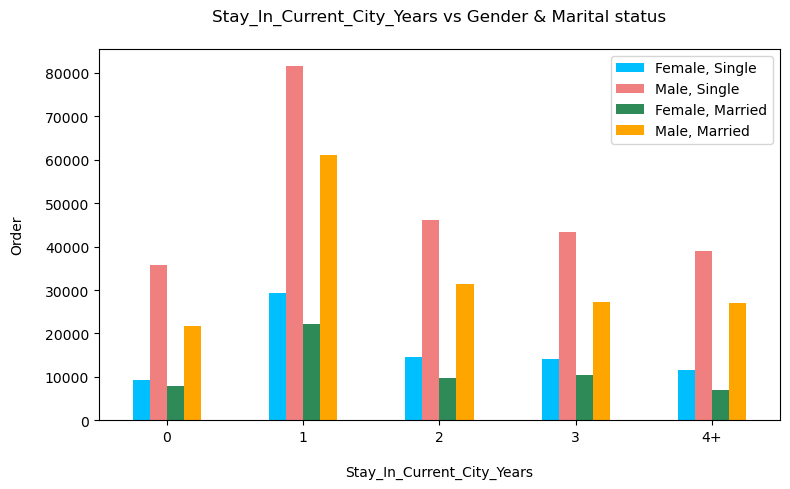

In [174]:
df_city_years_gms = df['G_MS'].astype(g_ms_type).groupby(df['Stay_In_Current_City_Years'].astype(city_years_type)).value_counts(sort=False).unstack()

ax = df_city_years_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(8,5))
plt.xlabel('Stay_In_Current_City_Years', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Stay_In_Current_City_Years vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column Product_Category_1 vs G_MS

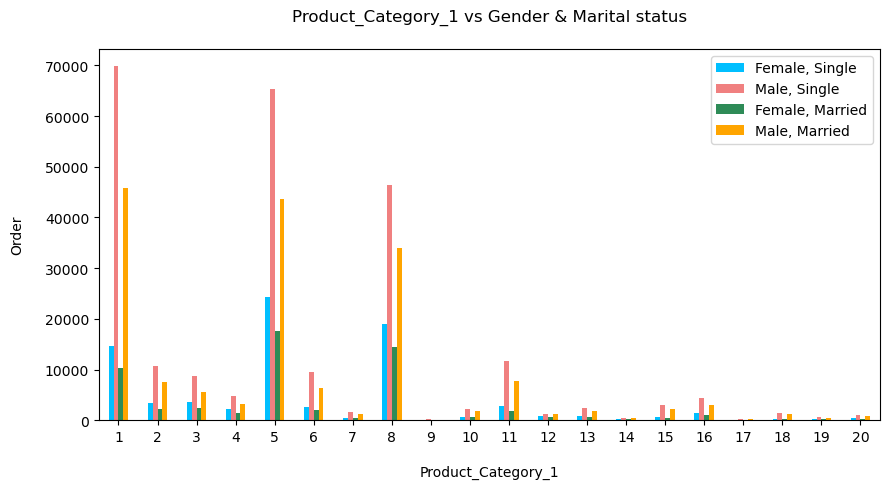

In [176]:
df_product_cat1_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_1'].astype(product_cat1_type)).value_counts(sort=False).unstack()

ax = df_product_cat1_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(9,5))
plt.xlabel('Product_Category_1', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_1 vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column Product_Category_2 vs G_MS

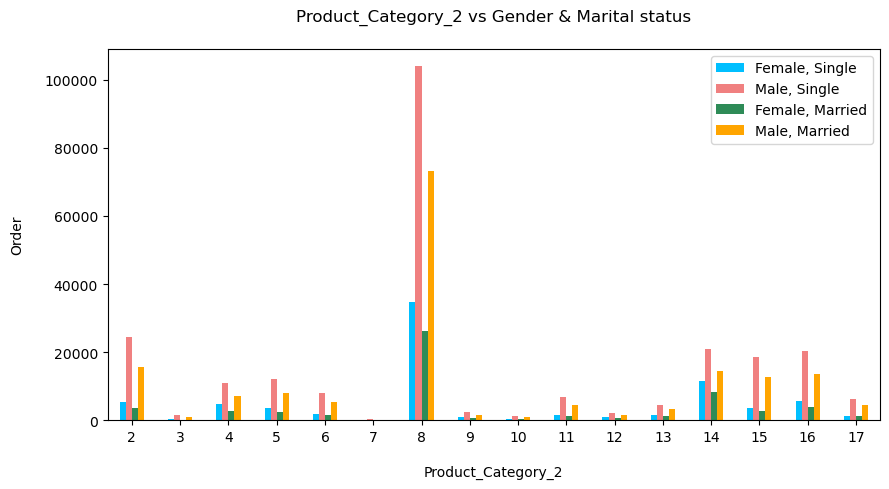

In [177]:
df_product_cat2_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_2'].astype(product_cat2_type)).value_counts(sort=False).unstack()

ax = df_product_cat2_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(9,5))
plt.xlabel('Product_Category_2', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_2 vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Column Product_Category_3 vs G_MS

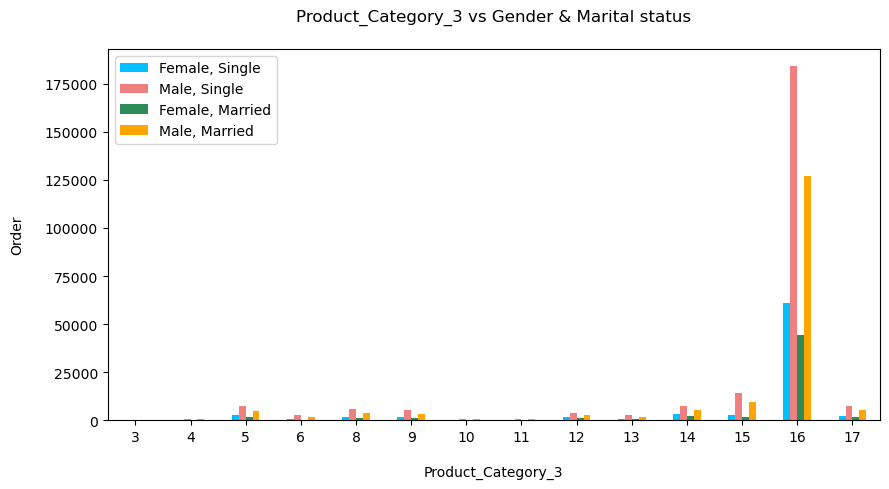

In [178]:
df_product_cat3_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_3'].astype(product_cat3_type)).value_counts(sort=False).unstack()

ax = df_product_cat3_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(9,5))
plt.xlabel('Product_Category_3', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_3 vs Gender & Marital status', pad=20)
plt.tight_layout()
plt.show;

### Combine all grouped plots by `Gender & Marital Status` into subplots

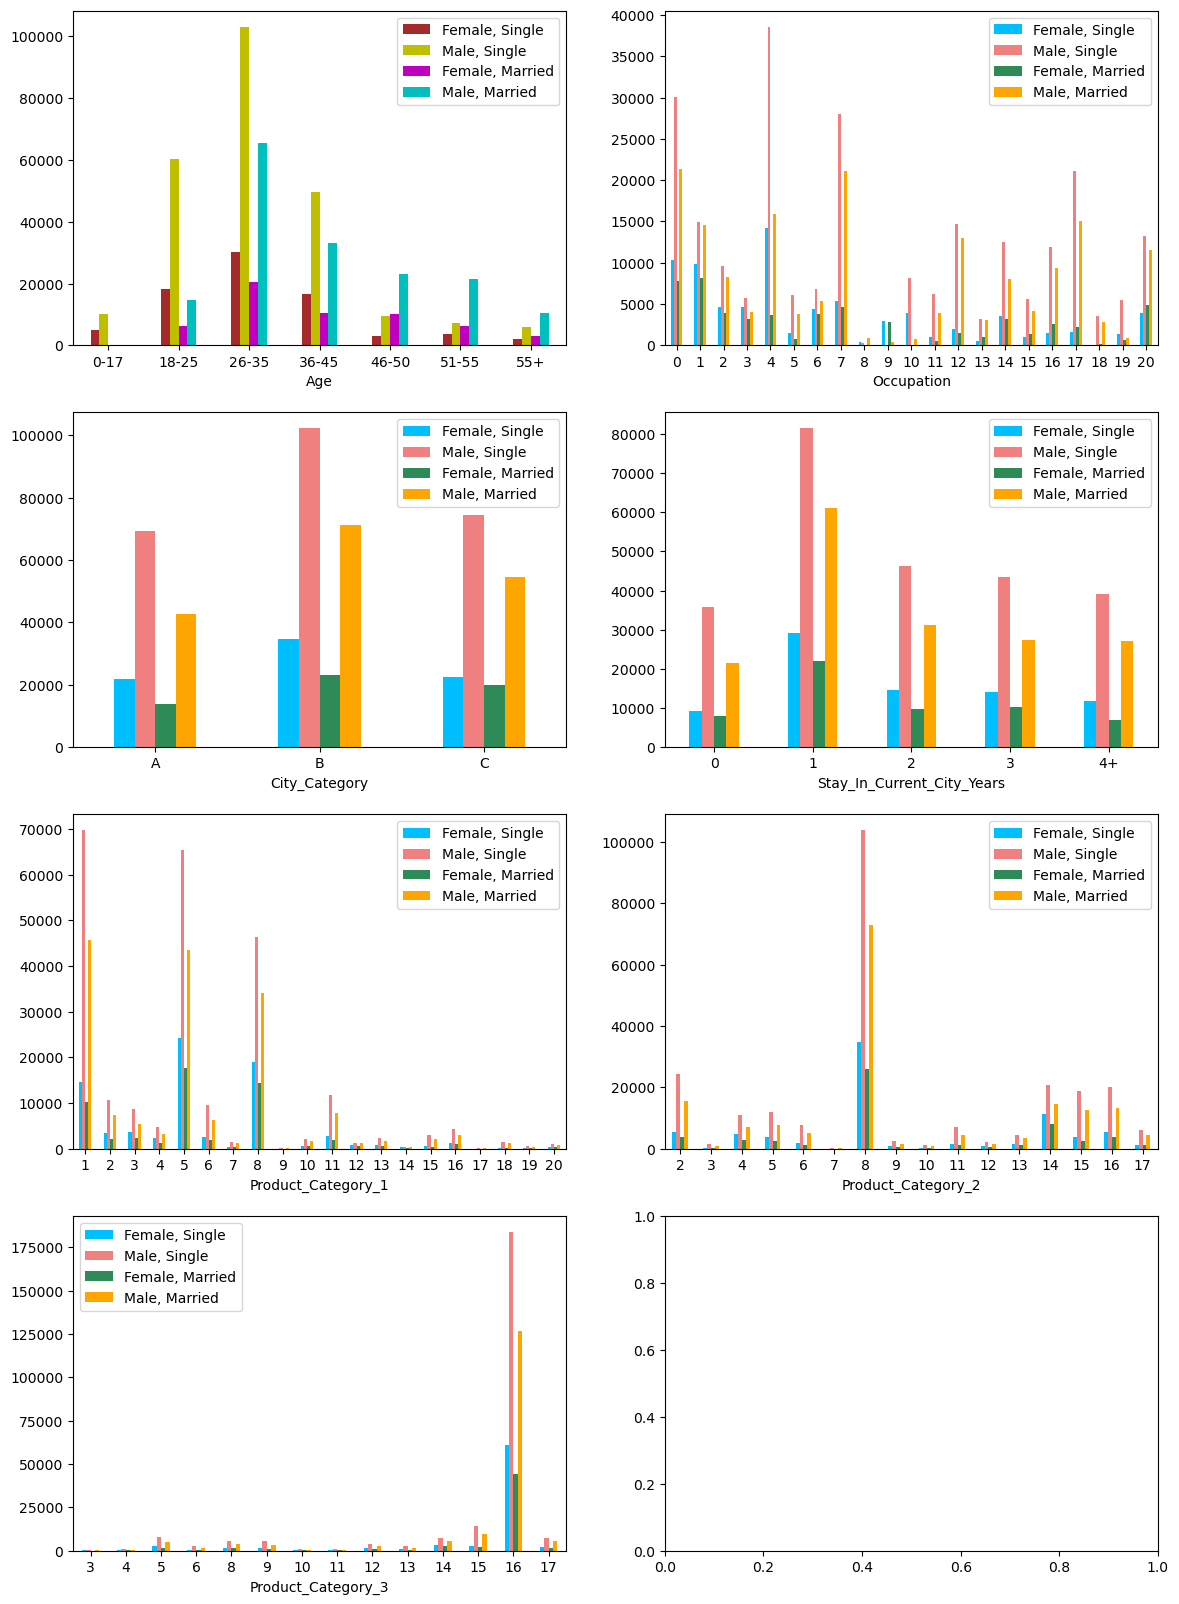

In [60]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,20))

df_gms_age.plot(ax=axes[0,0],
                kind='bar', 
                stacked=False,
                color=['brown', 'y', 'm','c'], 
                rot=0);

df_occ_gms.plot(ax=axes[0,1],
                kind='bar', 
                stacked=False,
                color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                      'orchid','gold','chocolate'], 
                rot=0);

df_citycat_gms.plot(ax=axes[1,0],
                    kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                          'orchid','gold','chocolate'], 
                    rot=0);
    
df_city_years_gms.plot(ax=axes[1,1],
                       kind='bar', 
                      stacked=False,
                      color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                            'orchid','gold','chocolate'], 
                      rot=0);

df_product_cat1_gms.plot(ax=axes[2,0],
                        kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                              'orchid','gold','chocolate'], 
                        rot=0);

df_product_cat2_gms.plot(ax=axes[2,1],
                        kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                              'orchid','gold','chocolate'], 
                        rot=0);

df_product_cat3_gms.plot(ax=axes[3,0],
                         kind='bar', 
                         stacked=False,
                         color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                               'orchid','gold','chocolate'], 
                          rot=0);